In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import re
import shutil
import time
from datetime import datetime
from datetime import timedelta
pd.set_option('display.max_columns',None)
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)


In [3]:
'''loading data'''
path=os.getcwd()
df=pd.read_excel(path+'\\datasource.xlsx',sheet_name='雷达图',parse_dates=True)
display('df')

,时间,应收账款,应收账款1,应收账款2
0,年1,3.00,2.00,1
1,年2,5.00,4.00,3
2,年3,6.00,5.00,4
3,年4,2.00,1.00,0
4,年5,1.20,0.20,0
5,年6,1.55,0.55,0


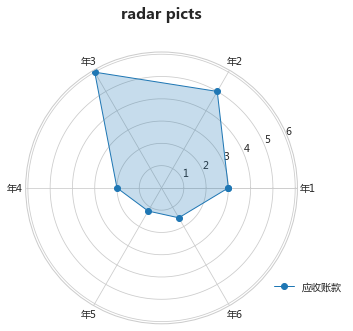

In [19]:
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
plt.style.use('seaborn-whitegrid') # 显示白底背景
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] # 识别汉化文字
plt.rcParams['axes.unicode_minus']=False # 识别汉化文字

'''plot one line radar picts'''

labels = df['时间']# 标签
dataLenth = 6 # 数据长度
data1 =df['应收账款']


angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False) # 分割圆周长 6个数字
data1 = np.concatenate((data1, [data1[0]])) # 闭合 3 5 6 2 1.2 1.55 3
angles = np.concatenate((angles, [angles[0]])) # 闭合 分割圆周长的 数字

fig=plt.figure(figsize=(10,5))
plt.polar(angles, data1, 'o-', linewidth=1,label='应收账款') #做极坐标系
plt.fill(angles, data1, alpha=0.25)# 填充


plt.thetagrids(angles * 180/np.pi, labels) # 设置网格、标签
plt.ylim(0,6.1)
plt.legend(loc=(0.9,0.1))
#对整体图像设置标题b
plt.title('radar picts',fontsize=15,fontweight='bold',pad=20)
#保存图片 
plt.savefig('雷达单图样例.png',bbox_inches='tight')

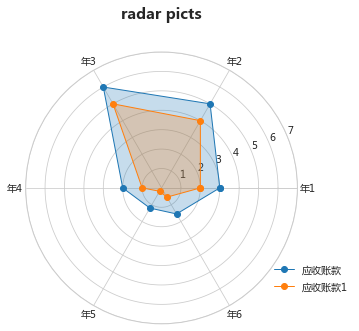

In [53]:
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
plt.style.use('seaborn-whitegrid') # 显示白底背景
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] # 识别汉化文字
plt.rcParams['axes.unicode_minus']=False # 识别汉化文字

'''plot two lines radar picts'''
# 雷达图2 - 极坐标的折线图/填图 - plt.polar()
# 首尾闭合

labels = df['时间']# 标签
dataLenth = 6 # 数据长度
data1 =df['应收账款']
data2 = df['应收账款1'] # 数据

angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False) # 分割圆周长 6个数字
data1 = np.concatenate((data1, [data1[0]])) # 闭合 3 5 6 2 1.2 1.55 3
data2 = np.concatenate((data2, [data2[0]])) # 闭合
angles = np.concatenate((angles, [angles[0]])) # 闭合 分割圆周长的 数字

fig=plt.figure(figsize=(10,5))
plt.polar(angles, data1, 'o-', linewidth=1,label='应收账款') #做极坐标系
plt.fill(angles, data1, alpha=0.25)# 填充
plt.polar(angles, data2, 'o-', linewidth=1,label='应收账款1') #做极坐标系
plt.fill(angles, data2, alpha=0.25)# 填充

plt.thetagrids(angles * 180/np.pi, labels) # 设置网格、标签
plt.ylim(0,7)
plt.legend(loc=(0.9,0.1))
#对整体图像设置标题b
plt.title('radar picts',fontsize=15,fontweight='bold',pad=20)
#保存图片 
plt.savefig('雷达双线图样例.png',bbox_inches='tight')

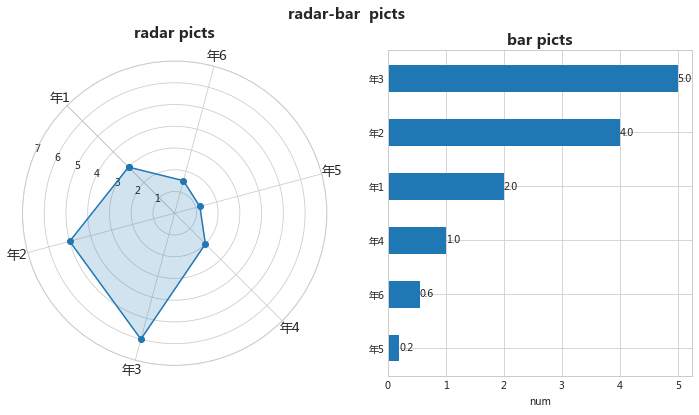

In [79]:
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
plt.style.use('seaborn-whitegrid') # 显示白底背景
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] # 识别汉化文字
plt.rcParams['axes.unicode_minus']=False # 识别汉化文字

'''plot radar-bar  picts'''
labels = df['时间']# 标签
dataLenth = 6 # 数据长度
data1 =df['应收账款']
angle = np.linspace(0, 2*np.pi, len(data1), endpoint=False) #data里有几个数据，就把整圆360°分成几份
angles = np.concatenate((angle, [angle[0]])) #增加第一个angle到所有angle里，以实现闭合
data1 = np.concatenate((data1, [data1[0]])) #增加第一个人的第一个data到第一个人所有的data里，以实现闭合
data2=df.sort_values(by=['应收账款1'],ascending=[True])

#设置图形整体布局以及标题
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(1,2,1,polar=True) #设置第一个坐标轴为极坐标体系
ax2=fig.add_subplot(1,2,2) #设置第二个坐标轴为极坐标体系
fig.subplots_adjust(wspace=0.2) #设置子图间的间距，为子图宽度的40%
plt.suptitle('radar-bar  picts',fontsize=15,fontweight='bold') #对整体图像设置标题

#设置第一个坐标轴
ax1.set_thetagrids(angles*180/np.pi, labels, fontproperties="Microsoft Yahei",fontsize=13) #设置网格标签
ax1.plot(angles,data1,"o-")
ax1.set_theta_zero_location('NW') #设置极坐标0°位置 nw northern west
ax1.set_rlim(0,7) #设置显示的极径范围
ax1.fill(angles,data1, alpha=0.2) 
ax1.set_title('radar picts',fontsize=15,fontweight='bold',pad=8)

# 设置第二个坐标轴
ax2.barh(data2['时间'],data2['应收账款1'],height=0.5)
ax2.set_xlabel('num')
for t1,t2 in zip(data2['时间'],data2['应收账款1']): 
    plt.text(t2, t1 ,'%.1f'%t2,va='center',fontsize=10)
ax2.set_title('bar picts',fontsize=15,fontweight='bold',pad=5)    
#保存图片 
plt.savefig('雷达柱状图样例.png',bbox_inches='tight')